In [1]:
import os
print(os.getcwd())
# os.chdir('../../')
os.chdir('../')

print(os.getcwd())

C:\Users\Mehran\Desktop\Desktop files\Bachelors Project\Project\DeepRLAgent
C:\Users\Mehran\Desktop\Desktop files\Bachelors Project\Project


In [4]:
import random
import torch
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

import math

from DeepQNetwork import DQN
from ReplayMemory import ReplayMemory, Transition
from DataLoader import BitmexDataLoader, YahooFinanceDataLoader
from Data import Data
from itertools import count
from tqdm import tqdm

from PatternDetectionInCandleStick.Evaluation import Evaluation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 30
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 5
n_actions = 3
n_step = 4


In [23]:
BITMEX_PATH = r'C:\Users\Mehran\Desktop\Desktop files\Bachelors Project\Project\Data\Bitmex\\'
BITMEX_FILE = 'XBTUSD-5m-data.csv'
data_loader = BitmexDataLoader(True)
data = Data(data_loader.data, data_loader.patterns, device, GAMMA, n_step)

In [20]:
GOOGL_PATH = r'C:\Users\Mehran\Desktop\Desktop files\Bachelors Project\Project\Data\GOOGL\\'
GOOGL_FILE = 'GOOGL.csv'
data_loader = YahooFinanceDataLoader(GOOGL_PATH, GOOGL_FILE, True)
data = Data(data_loader.data, data_loader.patterns, device, GAMMA, n_step)

In [26]:
BTC_USD_PATH = r'C:\Users\Mehran\Desktop\Desktop files\Bachelors Project\Project\Data\BTC-USD\\'
BTC_USD_FILE = r'BTC-USD.csv'
data_loader = YahooFinanceDataLoader(BTC_USD_PATH, BTC_USD_FILE, True)
data = Data(data_loader.data, data_loader.patterns, device, GAMMA, n_step)

In [27]:
# file_name = 'Google1'
file_name = 'Bitcoin1'
# file_name = 'Bitmex'

test_net = DQN(data.state_size, n_actions)
test_net.load_state_dict(torch.load(f'Objects/{file_name}.pkl'))
test_net.to(device)
action_list = []
data_iter = data.__iter__()
for batch in data_iter:
    action_batch = test_net(batch).max(1)[1]
    action_list += list(action_batch.cpu().numpy())

data.make_investment(action_list)
ev_RuleBased = Evaluation(data.data, 'action', 1000)
ev_agent = Evaluation(data.data, 'action_agent', 1000)

print("RuleBased:")
ev_RuleBased.evaluate()
print('*' * 80)
print("Agent:")
ev_agent.evaluate()

agent_portfolio = ev_agent.get_daily_portfolio_value()
RuleBased_portfolio = ev_RuleBased.get_daily_portfolio_value()

yeah buddy exception
RuleBased:
Historical VAR is -4.0
Variance-Covariance VAR with 95% confidence is -4.135529342653922
Variance-Covariance VAR with 99% confidence is -5.839868708111297
##################################################
Arithmetic Return: -20.314230955271434
##################################################
Logarithmic Return: 43.144009113119445
##################################################
Average daily return: -0.027789645629646285
##################################################
Daily return variance (return type: Arithmetic): 6.281947821469819
##################################################
Daily return variance (return type: Logarithmic): 6.245559761681891
##################################################
Time weighted return: 0.24149011524095232
##################################################
Total Return: 0.6495729765547616
##################################################
Sharp Ratio: -0.011087556510840969
######################################

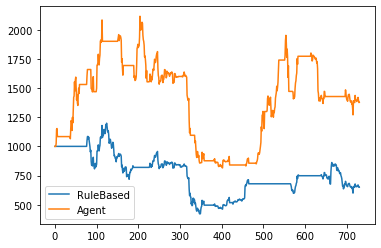

In [28]:
plt.plot(np.arange(len(RuleBased_portfolio)), RuleBased_portfolio, label='RuleBased')
plt.plot(np.arange(len(agent_portfolio)), agent_portfolio, label='Agent')
plt.legend()
plt.savefig("gamma0.7&eps0.1&n3.jpg")
plt.savefig('Bitcoin.jpg')